In [2]:
import json
import pandas as pd
import numpy as np

with open('../predicts_96k.json') as f:
    contents = json.load(f)
s1 = pd.Series(contents.keys())
s2 = pd.Series(contents.values())
df = pd.concat([s1, s2], axis=1)
df = df.rename(columns={0: 'file_name', 1: 'predicted_class'})
# df.to_csv('classification.csv')
# df[df['predicted_class'] == 1].sample(20)

{0: 86043, 1: 3181, 2: 338, 3: 23}


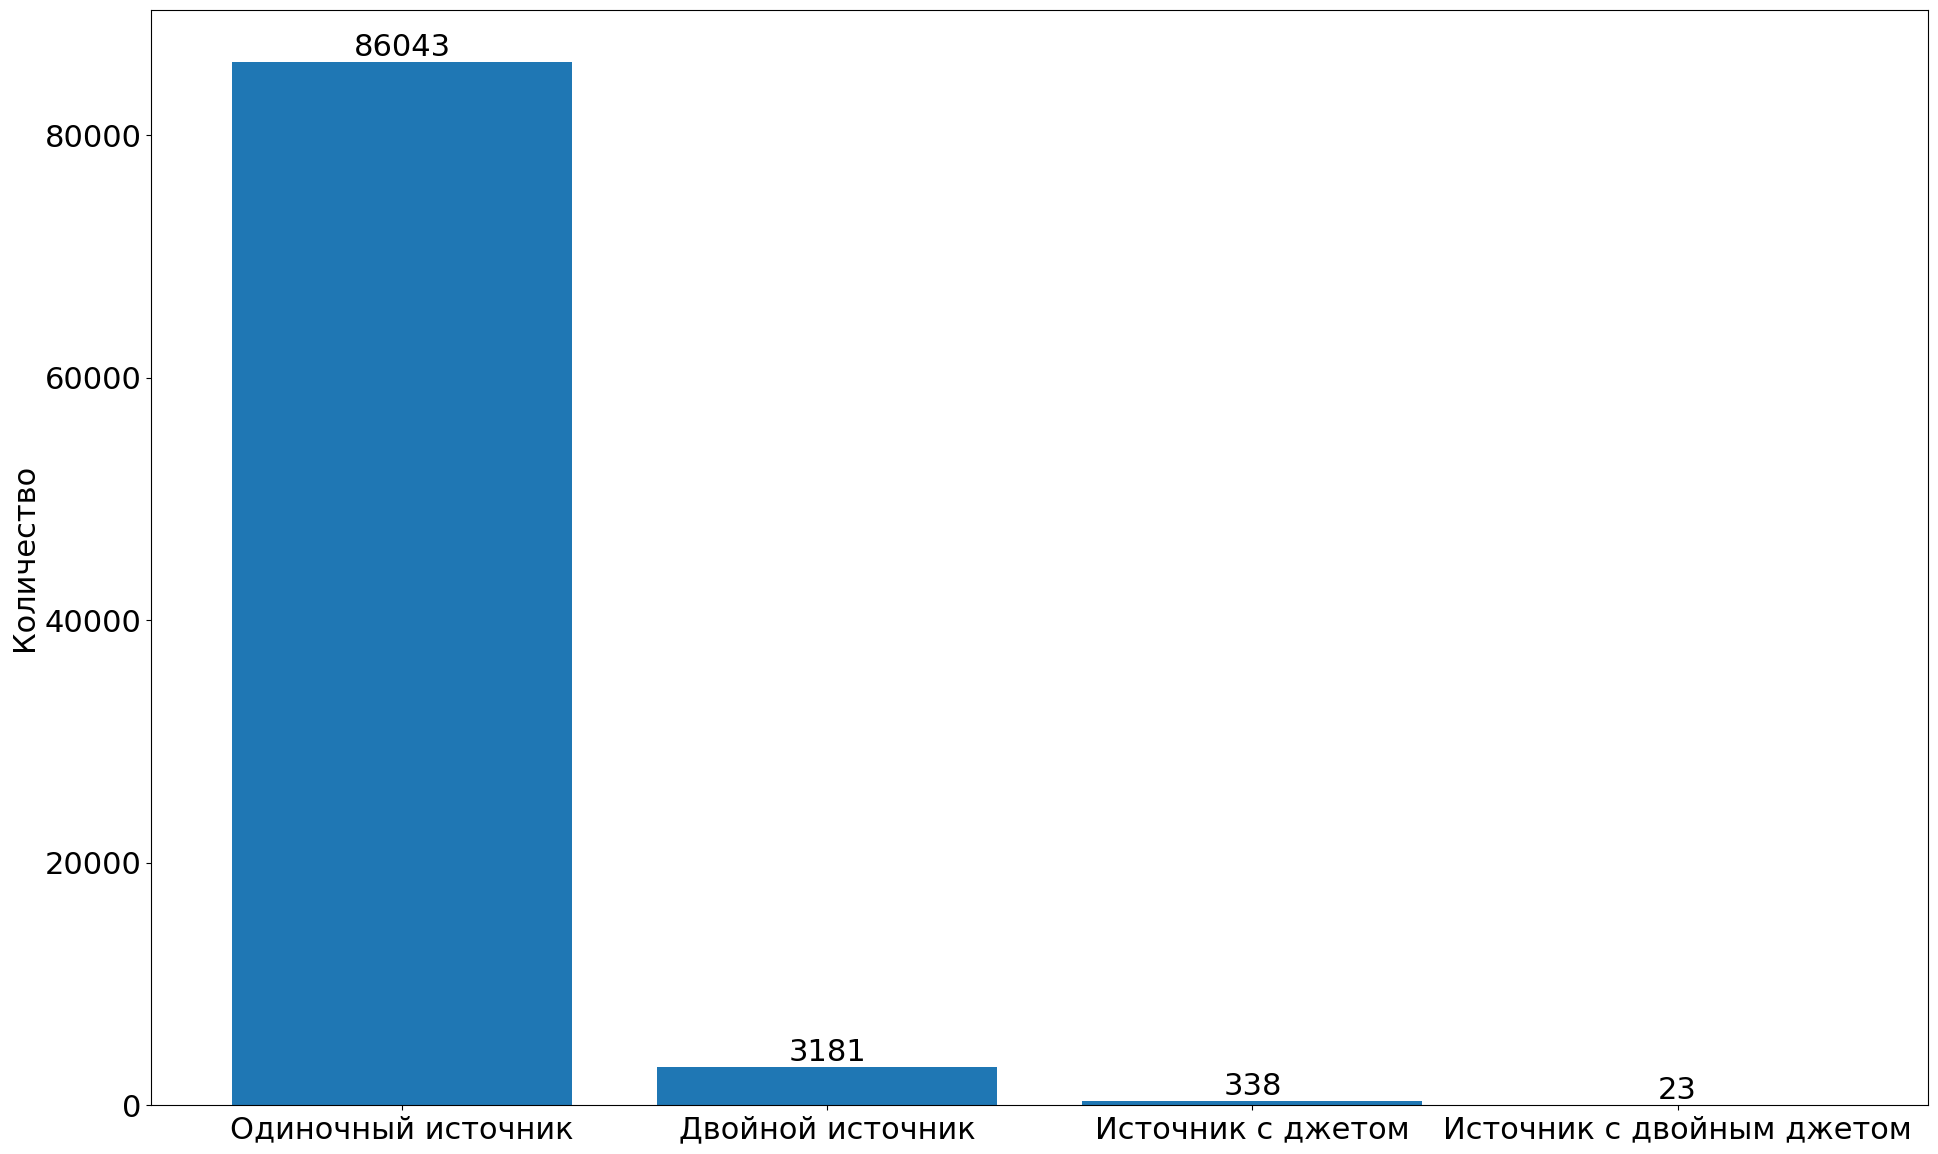

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})
labels = ['Одиночный источник', 'Двойной источник',
          'Источник с джетом', 'Источник с двойным джетом']
res = dict(Counter(contents.values()))
res = {k: v for k, v in sorted(res.items())}
print(res)
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
bar = ax.bar(labels, res.values())
ax.bar_label(bar, labels=res.values())
# ax.set_xlabel('Классы истинных изображений')
ax.set_ylabel('Количество')
# ax.set_title('Гистограмма классификации')
fig.tight_layout()
plt.show()

In [4]:
# examples = {}

# count0, count1, count2, count3 = 0, 0, 0, 0
# for obj, cls in contents.items():
#     if cls == 0 and count0 < 3:
#         examples[obj] = cls
#         count0 += 1
#     elif cls == 1 and count1 < 3:
#         examples[obj] = cls
#         count1 += 1
#     elif cls == 2 and count2 < 3:
#         examples[obj] = cls
#         count2 += 1
#     elif cls == 3 and count3 < 3:
#         examples[obj] = cls
#         count3 += 1
# examples = sorted(examples)
# examples

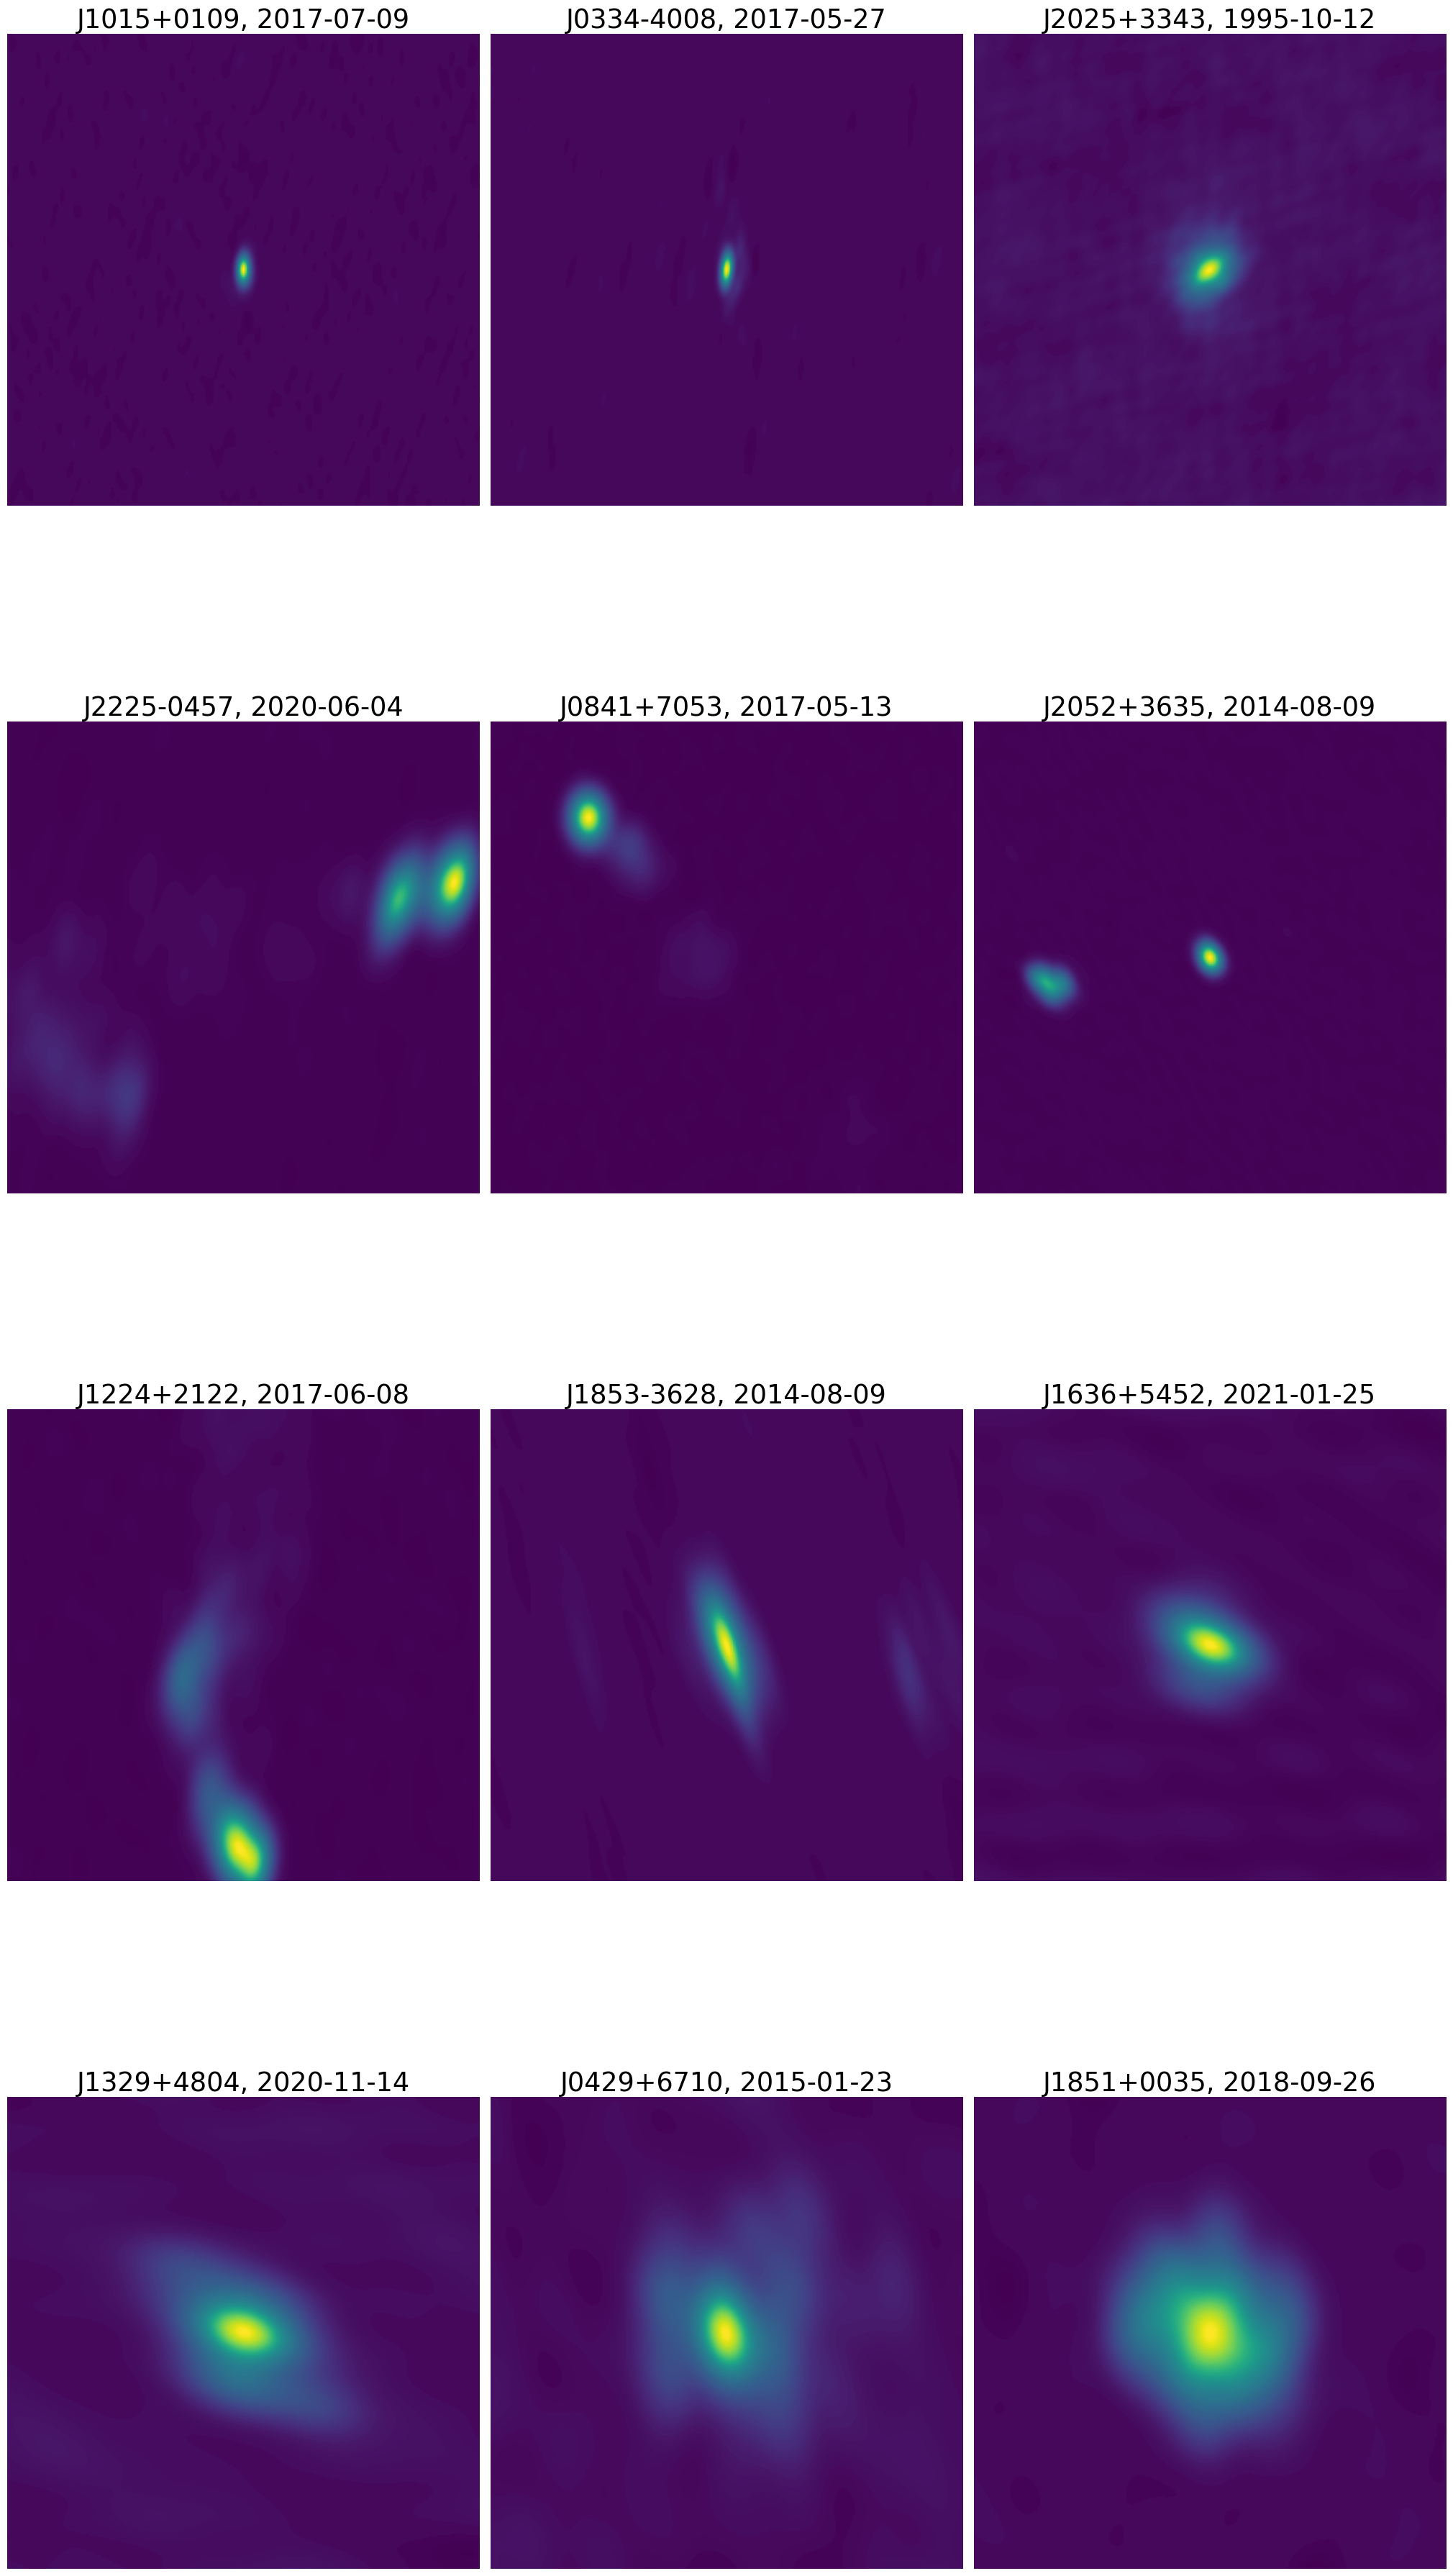

In [11]:
from PIL import Image

files = [
    'J1015+0109_S_2017_07_09_pus_map.png',
    'J0334-4008_S_2017_05_27_pus_map.png',
    'J2025+3343_S_1995_10_12_fey_map.png',
    'J2225-0457_Q_2020_06_04_mar_map.png', 
    'J0841+7053_Q_2017_05_13_mar_map.png',
    'J2052+3635_S_2014_08_09_pus_map.png',
    'J1224+2122_Q_2017_06_08_mar_map.png',
    'J1853-3628_X_2014_08_09_zb_map.png',
    'J1636+5452_X_2021_01_25_pet_map.png',
    'J1329+4804_X_2020_11_14_pet_map.png',
    'J0429+6710_X_2015_01_23_pet_map.png',
    'J1851+0035_X_2018_09_26_pet_map.png'
]
fig, axes = plt.subplots(4, 3, figsize=(20, 40))
for i, file in enumerate(files):
    obj = file.split('_')[0]
    date = '-'.join(file.split('_')[2:5])
    im = np.asarray(Image.open(f'../data/{file}').convert('L'))
    im = im[im.shape[0]//6:5 * im.shape[0]//6, im.shape[1]//6:5 * im.shape[1]//6]
    axes[i//3][i%3].imshow(im)
    axes[i//3][i%3].axis('off')
    axes[i//3][i%3].set_title(f'{obj}, {date}')
fig.tight_layout(pad=0, w_pad=0.5, h_pad=0)
plt.show()